# Multi-object Tracking using ObjectTracker

Deep learning based Object Detection models in arcgis.learn can be used to detect objects of interest. The [Object detection with arcgis.learn](https://developers.arcgis.com/python/guide/object-detection/) guide details how we can train such models and use them to detect objects. Deep learning based Object Tracking models in arcgis.learn can be used to track objects, given the location of the target object in the first frame of the sequence. The [Track Objects using SiamMask](https://developers.arcgis.com/python/guide/track_objects_using_siammask/) guide details how we can train such models and use them to track objects. 
This guide describes the usage of **ObjectTracker** class in arcgis.learn which pairs Object Detection models and Object Tracking models to enable Deep Learning powered multi-object tracking.  

<p align="center">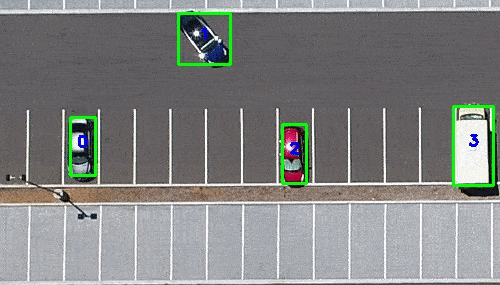</p>

<center>Figure 1. Example showing multi-object tracking using ObjectTracker</center>

### Workflow Steps

***Step 1*** Train Object Detector

Based on the use-case, we select the appropriate object detection model from the list of models available in arcgis.learn. The steps outlined in the [Object detection with arcgis.learn](https://developers.arcgis.com/python/guide/object-detection/) guide are followed to train a model for the targeted use-case.

***Step 2*** Train Object Tracker

Follow the steps outlined in [Track Objects using SiamMask]() guide to train an object tracking model for the targeted use-case.

***Step 3*** Initialize and track objects using **ObjectTracker**

The ObjectTracker class lets us use Object Detector model trained in *Step 1* and Object Tracking model trained in *Step 2* together.
We can load the trained models using their respective model classes and use the model instances to create an ObjectTracker instance. To use the ObjectTracker instance, initialize the required/optional parameters and call the init/update methods as described below.

## ObjectTracker implementation in `arcgis.learn`

Import the Object Detection model class and Object Tracking model class from arcgis.learn module.

In [ ]:
from arcgis.learn import <Object Detection Model>, <Object Tracking Model>

**Note**: Object Detection Model refers to any of the object detection models available in arcgis.learn. Object Tracking Model refers to any of the object tracking models available in arcgis.learn

Import the ObjectTracker class from arcgis.learn module.

In [ ]:
from arcgis.learn import ObjectTracker

## Instantiate ObjectTracker

In [ ]:
detection_model = <Object Detection Model>.from_model(DETECTION_MODEL_PATH)
tracking_model = <Object Tracking Model>.from_model(TRACKING_MODEL_PATH)

**Note**: DETECTION_MODEL_PATH refers to the path pointing to the trained object detection model obtained in step 1 of the workflow. TRACKING_MODEL_PATH refers to the path pointing to the trained object tracking model obtained in step 2 of the workflow.

## Initialize Tracker Options

*Tracker Options* refers to a set of parameters which can be initialized to values based on the specific application. If not initialized, the parameters are set to default values.

* The parameters to be passed are as follows:
    * `detection_interval`: Interval in frames at which the detector is invoked.
    
    * `detection_threshold`:  Lower threshold for selecting the detections.
    
    * `detect_track_failure`: Flag which enables/disables the logic to detect whether the object appearance has changed detection.
    
    * `recover_track`: Flag which enables/disables track recovery post failure.

    * `stab_period`: Number of frames after which post processing starts.
    
    * `detect_fail_interval`: Number of frames after which to detect track failure.
    
    * `min_obj_size`: Size in pixels below which tracking is assumed to have failed.
    
    * `template_history`: Number of frames before the current frame at which template image is fetched.

    * `status_history`: Number of frames over which status of the track is used to detect track failure.

    * `status_fail_threshold`: Threshold for the ratio between number of frames for which object is searched for and the total number of frames which needs to be crossed for track failure detection.
    
    * `search_period`: Number of frames for which object is searched for before declaring object is lost.

    * `knn_distance_ratio`: Threshold for ratio of the distances between template descriptor and the two best matched detection descriptor, used for filtering best matches.
    
    * `recover_conf_threshold`: Minimum confidence value over which recovery logic is enabled.
    
    * `recover_iou_threshold`: Minimum overlap between template and detection for successful recovery.   

In [ ]:
tracker = ObjectTracker(tracking_model, detector=detection_model, tracker_options=TRACKER_OPTIONS)

## init and update methods

### Initialize objects

This method helps in initializing detected object(s) using output of object detection model

In [ ]:
tracks = tracker.init(frame)

* The parameters to be passed are as follows:
    * `frame`: Required numpy array. frame is used to initialize the objects to track..
    
    * `detections`: Optional list. A list of bounding box to intialize the tracks.
    
    * `labels`: Optional list. A list of labels corresponding to the detections.
    
    * `reset`: Optional flag. Indicates whether to reset the tracker and remove all existing tracks before initialization.
    

The method returns list of initialized tracks
    
**Note:** Each time detections and labels are passed, the length of the detections must match to the length of the tags.

### Update the location of objects

This method helps in updating the location of objects and reinitializing object(s) 

In [ ]:
tracks = tracker.update(frame)

* The parameters to be passed are as follows:
    * `frame`: Required numpy array. frame is the current frame to be used to track the objects.

The method returns list of updated tracks

### Sample code

The following code snippet reads frames from a video, processes them using ObjectTracker class APIs and writes the output annotations to a file.

In [ ]:
from arcgis.learn import ObjectTracker, <Object Detection Model>, <Object Tracking Model>
import cv2

detection_model = <Object Detection Model>.from_model(DETECTION_MODEL_PATH)
tracking_model = <Object Tracking Model>.from_model(TRACKING_MODEL_PATH)

tracker = ObjectTracker(tracking_model, detector=detection_model)

cap = cv2.VideoCapture(str(INPUT_VIDEO_PATH))
cap_write = cv2.VideoWriter(filename=OUTPUT_VIDEO_PATH, apiPreference=cv2.CAP_FFMPEG, \
                            fourcc=cv2.VideoWriter_fourcc(*'MJPG'), fps=30, frameSize=(1920, 1080))

success, frame = cap.read()

if success:
    tracks = tracker.init(frame)
    for track in tracks:
        p1 = (int(track.bbox[0]), int(track.bbox[1]))
        p2 = (int(track.bbox[0] + track.bbox[2]), int(track.bbox[1] + track.bbox[3]))
        cv2.rectangle(frame, p1, p2, (0, 255, 0), 2, 1)
    cap_write.write(frame)


while cap.isOpened():
    success, frame = cap.read()
    tracks = tracker.update(frame)

    for track in tracks:
        p1 = (int(track.bbox[0]), int(track.bbox[1]))
        p2 = (int(track.bbox[0] + track.bbox[2]), int(track.bbox[1] + track.bbox[3]))
        cv2.rectangle(frame, p1, p2, (0, 0, 255), 2, 1)
    cap_write.write(frame)

    if not success:
        break

cap.release()

## References

ObjectTracker class API Reference [https://developers.arcgis.com/python/api-reference/arcgis.learn.toc.html#objecttracker ]